In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
pred = np.load(r'model_eval/omg_pred.npy')

In [5]:
truth = np.load(r'model_eval/omg_truth.npy')

In [6]:
_pred = []
for pred_ in pred:
    for pred__ in pred_:
        # because the output of a model is an array with predicted label having the highest value
        _pred.append(np.argmax(pred__).item())
len(_pred)

1280

In [7]:
_pred = np.array(_pred).reshape(40,32).flatten()
_pred

In [8]:
_truth = truth.flatten()
_truth

In [9]:
classes = np.unique(_truth)

# Initialize variables to store results
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over each class and compute precision, recall, and F1-score
for cls in classes:
    # True Positives (TP): Both y_true and y_pred are cls
    TP = np.sum((_truth == cls) & (_pred == cls))
    
    # False Positives (FP): _pred is cls, but _truth is not
    FP = np.sum((_truth != cls) & (_pred == cls))
    
    # False Negatives (FN): _truth is cls, but _pred is not
    FN = np.sum((_truth == cls) & (_pred != cls))
    
    # Precision: TP / (TP + FP)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    # Recall: TP / (TP + FN)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # F1-score: 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Store results
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Display the results for each class
for i, cls in enumerate(classes):
    print(f"Class {cls}: Precision = {precision_scores[i]:.2f}, Recall = {recall_scores[i]:.2f}, F1-Score = {f1_scores[i]:.2f}")

# Average (Macro-Averaging)
macro_precision = np.mean(precision_scores)
macro_recall = np.mean(recall_scores)
macro_f1 = np.mean(f1_scores)

print(f"\nMacro-Averaged Precision: {macro_precision:.2f}")
print(f"Macro-Averaged Recall: {macro_recall:.2f}")
print(f"Macro-Averaged F1-Score: {macro_f1:.2f}")

Class 0: Precision = 0.35, Recall = 0.25, F1-Score = 0.29
Class 1: Precision = 0.24, Recall = 0.23, F1-Score = 0.24
Class 2: Precision = 0.55, Recall = 0.45, F1-Score = 0.49
Class 3: Precision = 0.45, Recall = 0.70, F1-Score = 0.55

Macro-Averaged Precision: 0.40
Macro-Averaged Recall: 0.41
Macro-Averaged F1-Score: 0.39


In [10]:
accuracy = np.sum(_pred == _truth) / len(_truth)
print(f"Accuracy : {accuracy*100}%")

Accuracy : 41.09375%


Text(45.722222222222214, 0.5, 'True Label')

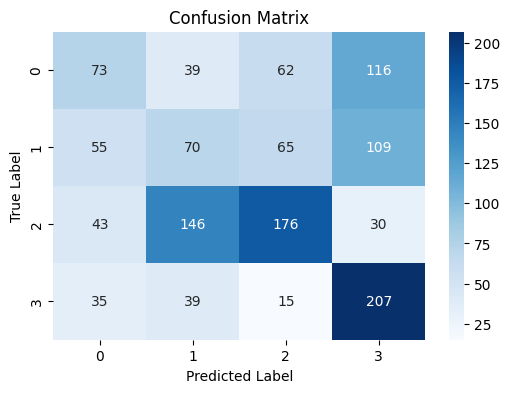

In [11]:
cm = confusion_matrix(_truth, _pred)

plt.figure(figsize=(6, 4))

# Create the heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(_truth), yticklabels=np.unique(_pred))

# Add labels and title
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")